## Interface with `py_sc_fermi`

To extend the analysis available in doped, we include and optional interface with the [`py_sc_fermi`]() code for analysis of self-consistent Fermi energies and defect concentrations. We'll go through how to use the interface to study defect concentrations in a couple of example systems.

### CdTe

In [1]:
from doped.interface.py_sc_fermi import FermiSolver
from monty.serialization import loadfn

vasprun_path = "CdTe/CdTe_bulk/vasp_ncl/vasprun.xml.gz"
pd = loadfn("CdTe/new_named_CdTe_dpd_doped_v2.json")

fs = FermiSolver(pd, vasprun_path)
fs.initialize_base_defect_system(temperature=300, chemical_potentials={"Cd": -1.01586484, "Te": -5.7220097228125})

fs.base_defect_system.report()

fs.update_defect_system_energies({"Cd": -2, "Te": -4})

Temperature :      300  (K)
SC Fermi level :      0.8145748711586007  (eV)
Concentrations:
n (electrons)  : 82662308.27727404 cm^-3
p (holes)      : 512982.2669013906 cm^-3
Te_i_Td_Te2.83_C3v_meta      : 2.3545174858389732e-51 cm^-3, (percentage of defective sites: 5.28e-70 %)
v_Te           : 62193.7405720077 cm^-3, (percentage of defective sites: 1.39e-14 %)
Te_Cd_C3v_metastable      : 6.619178605343578e-55 cm^-3, (percentage of defective sites: 1.48e-73 %)
v_Te_unperturbed      : 1.7640184152954292e-32 cm^-3, (percentage of defective sites: 3.95e-51 %)
Te_i_Td_Te2.83      : 5.554682465340736e-32 cm^-3, (percentage of defective sites: 1.24e-50 %)
Te_Cd_metastable2      : 8.342562421690168e-62 cm^-3, (percentage of defective sites: 1.87e-80 %)
v_Cd_Td        : 3.6257834773164173e-40 cm^-3, (percentage of defective sites: 8.13e-59 %)
Cd_i_Td_Te2.83      : 41012551.6701372 cm^-3, (percentage of defective sites: 9.19e-12 %)
v_Te_orig_non_JT_distorted      : 1.0570223699675004e-15 cm^-3, 

DefectSystem
  nelect: 576 e
  bandgap: 1.4985999999999997 eV
  volume: 2241.2856479961474 A^3
  temperature: 300 K

Contains defect species:

Te_i_Td_Te2.83_C3v_meta, nsites=1
  q=+2, e=1.0171762912959759, deg=128

v_Te, nsites=1
  q=-1, e=5.356838462435437, deg=384
  q=-2, e=6.630156357012061, deg=192
  q=+0, e=3.5085648099999958, deg=192
  q=+1, e=2.9957469012734035, deg=32
  q=+2, e=1.1262927300148755, deg=32

Te_Cd_C3v_metastable, nsites=1
  q=+1, e=1.0590001759011582, deg=128

v_Te_unperturbed, nsites=1
  q=-2, e=6.624358932044777, deg=384

Te_i_Td_Te2.83, nsites=1
  q=+0, e=1.5036391300000105, deg=192
  q=+1, e=0.8896267840692613, deg=384
  q=+2, e=0.8323487851421243, deg=128

Te_Cd_metastable2, nsites=1
  q=-1, e=3.116772034055376, deg=256

v_Cd_Td, nsites=1
  q=+0, e=2.682410190000013, deg=32

Cd_i_Td_Te2.83, nsites=1
  q=+0, e=3.4551517099999955, deg=32
  q=+1, e=1.7678366888128179, deg=32
  q=+2, e=0.22060303670993964, deg=32

v_Te_orig_non_JT_distorted, nsites=1
  q=+0, e=3

In [2]:
import numpy as np

temp_range = np.arange(300, 1000, 20)
df = fs.scan_temperature_and_save(temp_range)

# Save to CSV
print(df)


     Temperature                   Defect  Concentration  Fermi Level
0            300                       p0   5.129823e+05     0.814575
1            300                       n0   8.266231e+07     0.814575
2            300  Te_i_Td_Te2.83_C3v_meta   2.354517e-51     0.814575
3            300                     v_Te   6.219374e+04     0.814575
4            300     Te_Cd_C3v_metastable   6.619179e-55     0.814575
..           ...                      ...            ...          ...
835          980         Cd_Te_metastable   2.239309e+09     0.940111
836          980              v_Te_shaken   1.081128e+04     0.940111
837          980                     v_Cd   1.051826e+12     0.940111
838          980    Te_Cd_-30%_metastable   6.601451e-03     0.940111
839          980                    Te_Cd   2.441737e+02     0.940111

[840 rows x 4 columns]


(1, 1e+17)

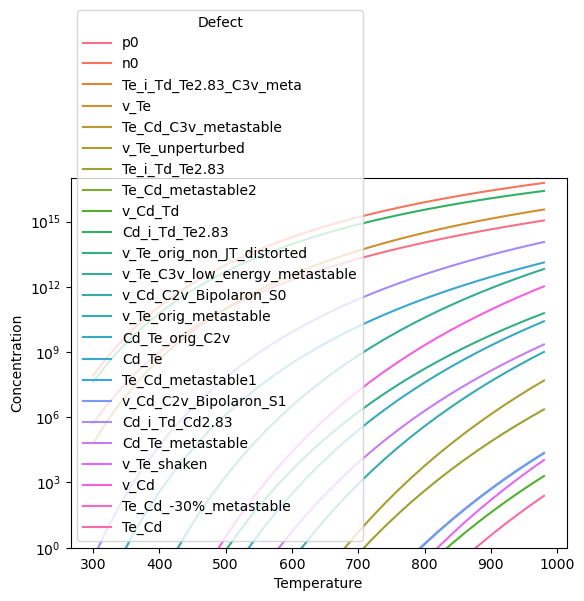

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df, x="Temperature", y="Concentration", hue="Defect")
plt.yscale("log")
plt.ylim(1, 1e17)

In [4]:
chem_pot_start = {"Cd": -1.01586484, "Te": -5.7220097228125}
chem_pot_end = {"Cd": -1.2, "Te": -5.8}
n_points = 100

df = fs.scan_chemical_potentials_and_save(chem_pot_start, chem_pot_end, n_points)
df.to_csv('concentration_vs_chem_pot_long_format.csv', index=False)

<Axes: xlabel='Cd', ylabel='Fermi Level'>

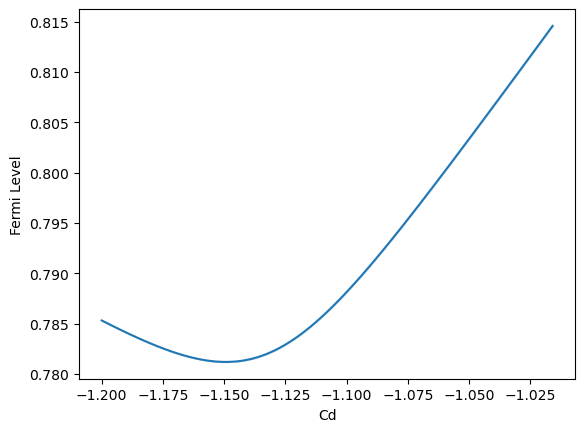

In [5]:
sns.lineplot(data=df, x="Cd", y="Fermi Level")

In [22]:
data = fs.scan_temperature_and_save(np.linspace(300, 800, 10), fix_concentration_temp=800)

<Axes: xlabel='Temperature', ylabel='Fermi Level'>

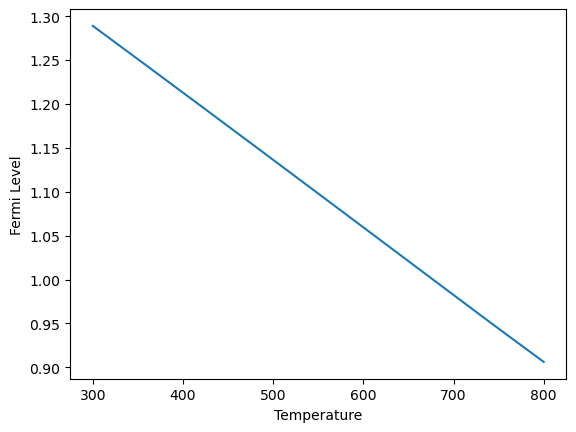

In [24]:
data = data[data["Defect"] == "n0"]
sns.lineplot(data=data, x="Temperature", y="Fermi Level")
